# Ecommerce Search Trends Analysis

This project analyzes user behavior during ecommerce search and product discovery using an open dataset.

## 1. Load and Preview Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update with your actual file path)
events = pd.read_csv('events.csv')
item_props = pd.read_csv('item_properties.csv')
category_tree = pd.read_csv('category_tree.csv')
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


## 2. Data Cleaning and Preparation

In [7]:
# Convert timestamp and extract useful features
events['event_time'] = pd.to_datetime(events['timestamp'], unit='ms')
events['hour'] = events['event_time'].dt.hour
events['day'] = events['event_time'].dt.day_name()
events['date'] = events['event_time'].dt.date

# Filter out inactive sessions or limit to a time range
events = events.dropna(subset=['itemid'])

In [8]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,event_time,hour,day,date
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,5,Tuesday,2015-06-02
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,5,Tuesday,2015-06-02
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,5,Tuesday,2015-06-02
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,5,Tuesday,2015-06-02
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,5,Tuesday,2015-06-02


## 3. Exploratory Data Analysis (EDA)

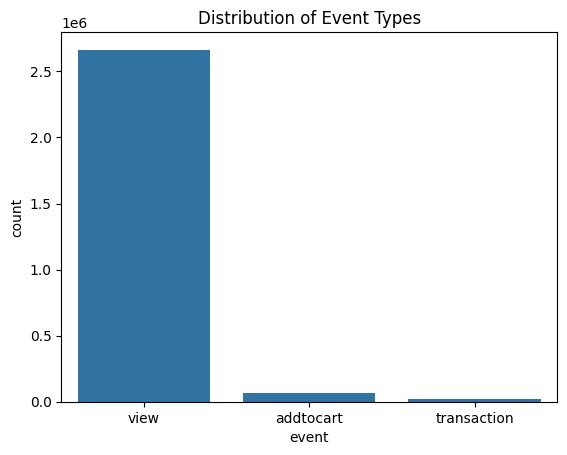

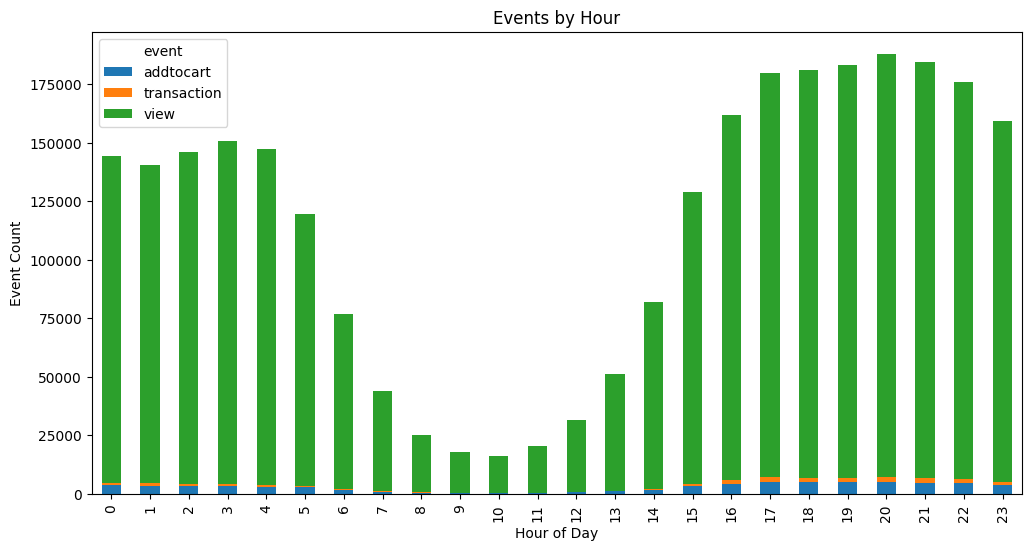

In [9]:
# Event distribution
sns.countplot(data=events, x='event')
plt.title('Distribution of Event Types')
plt.show()

# Events by hour
hourly = events.groupby(['hour', 'event']).size().unstack(fill_value=0)
hourly.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Events by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Event Count')
plt.show()

## 4. Conversion Funnel Analysis

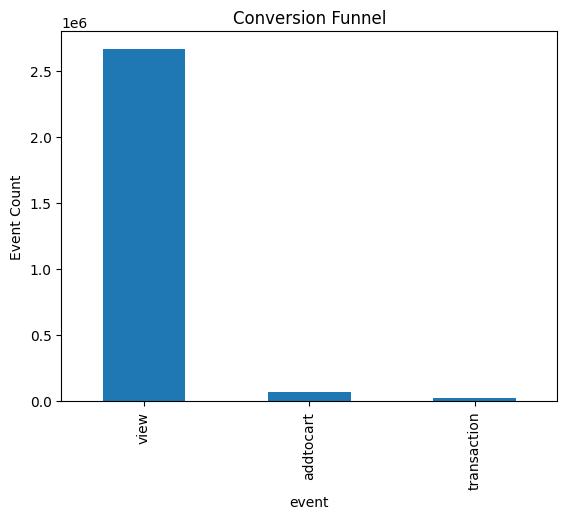

In [10]:
# Funnel: view -> addtocart -> transaction
funnel = events['event'].value_counts()
funnel = funnel[['view', 'addtocart', 'transaction']]
funnel.plot(kind='bar')
plt.title('Conversion Funnel')
plt.ylabel('Event Count')
plt.show()

## 5.Top Products and Categories

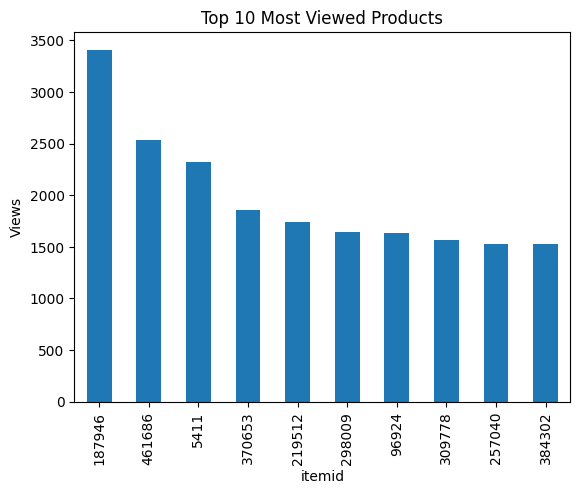

In [11]:
# Merge with product metadata if needed , For example: most viewed or purchased items

top_items = events[events['event'] == 'view']['itemid'].value_counts().head(10)
top_items.plot(kind='bar')
plt.title('Top 10 Most Viewed Products')
plt.ylabel('Views')
plt.show()